In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
from collections import deque
plt.rcParams["figure.figsize"] = (10,10)

# La formación de precios de productos cuya oferta se establece en función del precio de mercado en el período de tiempo anterior se puede modelar utilizando el siguiente sistema:
### Qt_demanda = a − bPt
### Qt_oferta = dPt−1 − c
### Qt_demanda = Qt_oferta = Qt
## Para cada conjunto de parámetros se pide:
## 1. Hallar la matriz del sistema.
## 2. Hallar el punto de equilibrio.
## 3. Realizar un análisis asintótico del sistema.
## 4. Graficar la variable precio en función del período (t) para 100 períodos.
## 5. Realizar un gráfico Cobweb para variable precio.

## Parametros:
### a) a = 10, b = 1, c = 0.4, d = 0.9, P0 = 10
### b) a = 0.9, b = 0.89, c = 0.5, d = 0.9, P0 = 1

## ==========

In [14]:
## 1. Hallar la matriz del sistema.

###  Pt = (a + c - d*Pt-1)/b

### Pt = (a + c - d*Pt-1)/b¶
### Qt = dPt−1 − c

## [-d/b   0   *  [ P_t-1    =  [ P_t
##   d     0]       Q_t-1 ]       Q_t ]


#a) [-0.9  0
#     0.9  0 ]
#
# a=10, b=1, c=0.4, d=0.9, p0=10


#b) [-0.9/0.89  0
#     0.9       0  ]
#
# a=0.9, b=0.89, c=0.5, d=0.9, p0=1

In [15]:
## 2. Hallar el punto de equilibrio. (Pt=Pt-1)

#a) -0.9Pt + 10.4 = Pt -> Pt = 10.4/1.9 = 104/19 = 5.474
#   0.9Pt - 0.4 = Qt -> Qt = 0.9*10.4/1.9 - 0.4 = 86/19 = 4.526
#
#b) (-0.9/0.89)Pt + (1.4/0.89) = Pt -> Pt = (1.4/0.89)/(1+(0.9/0.89)) = 140/179 = 0.782
#   0.9Pt - 0.5 = Qt -> Qt = 0.9*140/179 - 0.5 = 73/358 = 0.204

In [16]:
## 3. Realizar un análisis asintótico del sistema. (Avas)

#a) det(A-𝜆I) = 0
#   det( [-0.9-𝜆  0   = (-0.9-𝜆)*(-𝜆) = (0.9+𝜆)*(𝜆) -> 𝜆_1 = 0, 𝜆_2 = -0.9 -> |𝜆_1| < 1, |𝜆_2| < 1, converge
#          0.9  -𝜆 ])
#


#b) det(A-𝜆I) = 0
#   det( [(-0.9/0.89)-𝜆    0    =  (-(0.9/0.89)-𝜆)*(-𝜆) = ((0.9/0.89)+𝜆)*(𝜆) -> 𝜆_1 = 0, 𝜆_2 = -0.9/0.89 > -1 
#           0.9           -𝜆 ])
#
# -> |𝜆_1| < 1, |𝜆_2| > 1, Saddle point, no converge

In [17]:
## 3. Realizar un análisis asintótico del sistema. (Simulacion)

def pt(p_t, a, b, c, d):
    return ((-d*p_t) + a + c)/b

#a)
p_t = 10
for i in range(10):
    p_t = pt(p_t,10,1,0.4,0.9)

print("a) P_10 = " + str(p_t))

p_t = 10
for i in range(100):
    p_t = pt(p_t,10,1,0.4,0.9)

print("   P_100 = " + str(p_t))

p_t = 10
for i in range(1000):
    p_t = pt(p_t,10,1,0.4,0.9)

print("   P_1000 = " + str(p_t))

p_t = 10
for i in range(10000):
    p_t = pt(p_t,10,1,0.4,0.9)

print("   P_10000 = " + str(p_t))



#b)
p_t = 1
for i in range(10):
    p_t = pt(p_t,0.9,0.89,0.5,0.9)

print("b) P_10 = " + str(p_t))

p_t = 1
for i in range(100):
    p_t = pt(p_t,0.9,0.89,0.5,0.9)

print("   P_100 = " + str(p_t))

p_t = 1
for i in range(1000):
    p_t = pt(p_t,0.9,0.89,0.5,0.9)

print("   P_1000 = " + str(p_t))

p_t = 1
for i in range(10000):
    p_t = pt(p_t,0.9,0.89,0.5,0.9)

print("   P_10000 = " + str(p_t))

a) P_10 = 7.051912939400001
   P_100 = 5.473804435805492
   P_1000 = 5.4736842105263195
   P_10000 = 5.4736842105263195
b) P_10 = 1.0257561804822872
   P_100 = 1.4481039299879928
   P_1000 = 15514.445742126276
   P_10000 = 7.298599283868638e+47


In [18]:
## 4. Graficar la variable precio en función del período (t) para 100 períodos.

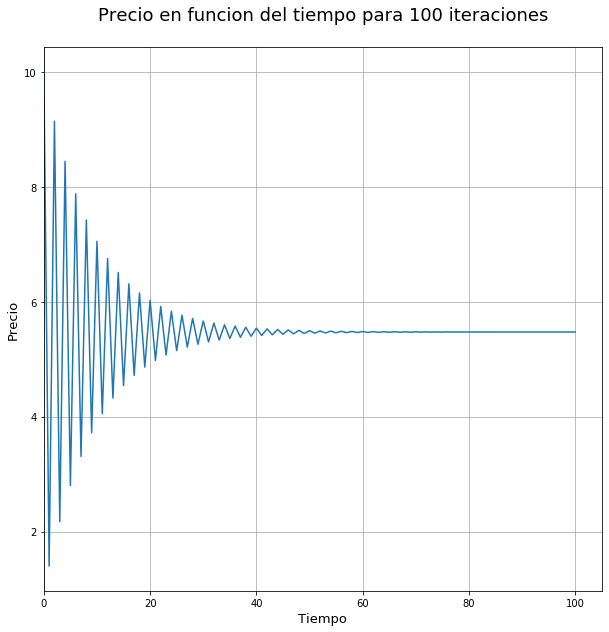

In [19]:
#a)
p_t = 10
vector_pt = [p_t]
for i in range(100):
    p_t = pt(p_t,10,1,0.4,0.9)
    vector_pt.append(p_t)
vector_t = range(101)
sns.lineplot(vector_t, vector_pt)
plt.xlim(left=0)
plt.xticks(range(0,101,20))
plt.title('Precio en funcion del tiempo para 100 iteraciones\n', fontsize=18)
plt.xlabel('Tiempo', fontsize=13)
plt.ylabel('Precio', fontsize=13)
plt.grid();


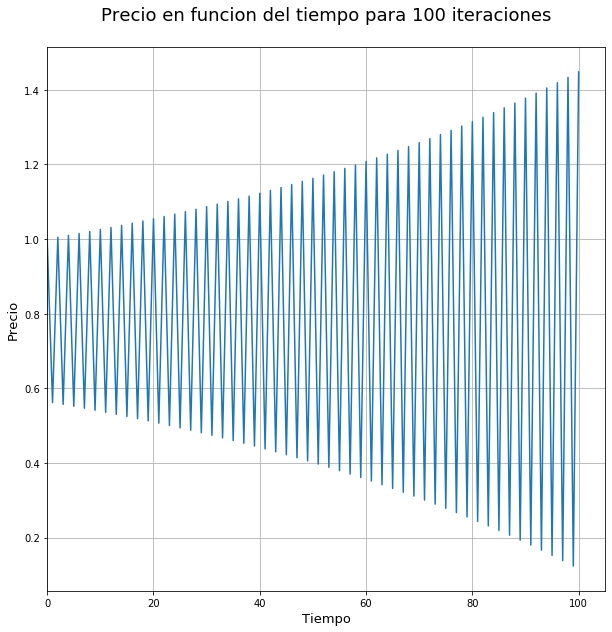

In [20]:
#b)
p_t = 1
vector_pt = [p_t]
for i in range(100):
    p_t = pt(p_t,0.9,0.89,0.5,0.9)
    vector_pt.append(p_t)
vector_t = range(101)
sns.lineplot(vector_t, vector_pt)
plt.xlim(left=0)
plt.xticks(range(0,101,20))
plt.title('Precio en funcion del tiempo para 100 iteraciones\n', fontsize=18)
plt.xlabel('Tiempo', fontsize=13)
plt.ylabel('Precio', fontsize=13)
plt.grid();

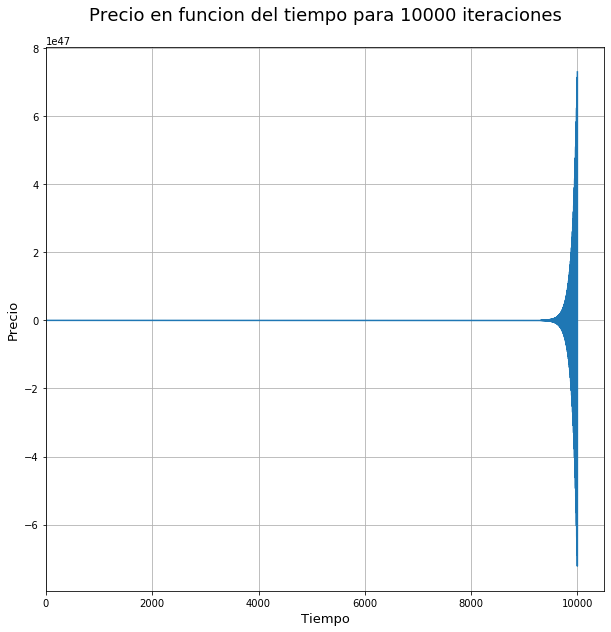

In [21]:
p_t = 1
vector_pt = [p_t]
for i in range(10000):
    p_t = pt(p_t,0.9,0.89,0.5,0.9)
    vector_pt.append(p_t)
vector_t = range(10001)
sns.lineplot(vector_t, vector_pt)
plt.xlim(left=0)
plt.xticks(range(0,10001,2000))
plt.title('Precio en funcion del tiempo para 10000 iteraciones\n', fontsize=18)
plt.xlabel('Tiempo', fontsize=13)
plt.ylabel('Precio', fontsize=13)
plt.grid();

In [22]:
## 5. Realizar un gráfico Cobweb para variable precio.

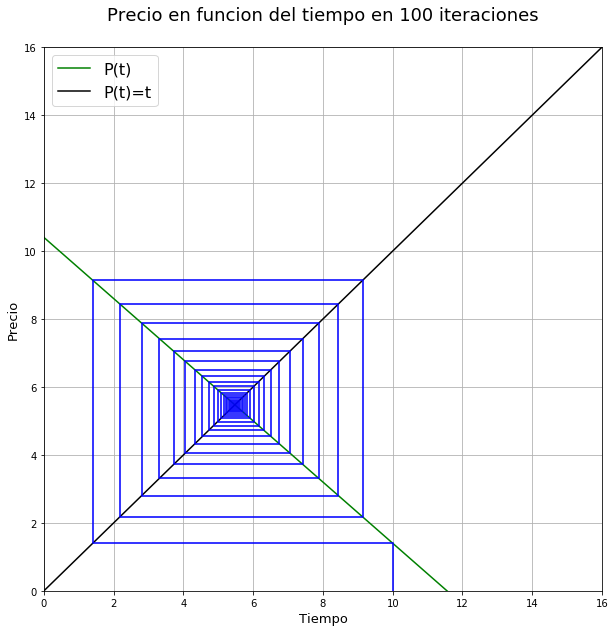

In [23]:
#a)
def plot_cobweb(f, a, b, c, d, x0, nmax, left_x, right_x, bottom_y, top_y):
    
    step = nmax/2000
    x = np.linspace(0, nmax + step, 2000)
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)

    # Graficar y = f(x) y tambien y = x
    f_x = []
    for i in x:
        f_x.append(f(i,a,b,c,d))
    
    ax.plot(x, f_x, c='g',label='P(t)')
    ax.plot(x, x, c='k',label='P(t)=t')

    # Iteramos x = f(x) nmax pasos, iniciando en (x0, 0).
    px, py = np.empty((2,nmax+1,2))  #Devuelve dos matrices de nmax+1 filas y 2 columnas
    px[0], py[0] = x0, 0
    u = 0
    v = 0
    for n in range(1, nmax, 2):
        px[n] = px[n-1]
        u = f(px[n-1][0], a, b, c , d)
        v = f(px[n-1][1], a, b, c , d)
        py[n] = [u,v]
        px[n+1] = py[n]
        py[n+1] = py[n]

    # Graficamos el camino obtenido por la iteracion.
    ax.plot(px, py, c='b', alpha=0.7)
    ax.grid()
    ax.set_xlabel('Tiempo', fontsize = 13)
    ax.set_ylabel('Precio', fontsize = 13)
    ax.set_title('Precio en funcion del tiempo en ' + str(nmax) + ' iteraciones\n', fontsize=18)

    ax.set_xlim(left=left_x, right=right_x)
    ax.set_ylim(bottom=bottom_y, top=top_y)
    
    plt.legend(prop={'size':16})
    plt.show();

plot_cobweb(f=pt, a=10, b=1, c=0.4, d=0.9, x0=10, nmax=100, left_x = 0,right_x = 16, bottom_y = 0, top_y = 16)

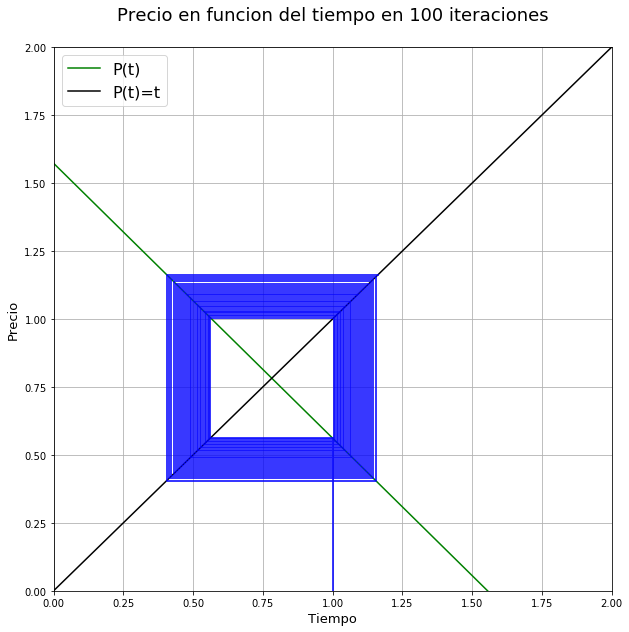

In [24]:
#b)
plot_cobweb(f=pt, a=0.9, b=0.89, c=0.5, d=0.9, x0=1, nmax=100, left_x = 0,right_x = 2, bottom_y = 0, top_y = 2)